In [4]:
%load_ext autoreload
%autoreload 2

import multiprocessing as mp
import torch
import wandb_util.wandb_util as wbu

torch.set_grad_enabled(False)
mp.set_start_method("spawn", force=True)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
from omegaconf import OmegaConf
from scripts.wandb_experiments.texgen_vs_gr_experiment import TexGenVsGrExperimentConfig, texgen_vs_gr_experiment

config = TexGenVsGrExperimentConfig(
    texgen_prompt="Deadpool",
    gr_prompt="Deadpool, blank background",
    anim_tag='backside:latest',
    texturing_tag='human_mv:latest',
    seed=0
)
config = OmegaConf.structured(config)

In [7]:
spec = texgen_vs_gr_experiment(config)

# wbu.visualize_spec(spec)

In [9]:
wbu.sync_experiment(texgen_vs_gr_experiment, config, "catwalk_180_deadpool")

Experiment: https://wandb.ai/romeu/diffusion-3D-features/groups/catwalk_180_deadpool/workspace

Would execute 4 new runs:
- GR
- ControlNet
- TexGen
- exp

Would delete 6 outdated runs:
- exp                            (shzlijen)
- TexGen_anim                    (pfispx92)
- GR                             (ctdy651e)
- ControlNet                     (3ey93fo4)
- make_texture                   (py4tqbtd)
- TexGen                         (ztg6vriq)

Do you want to continue? (y/n)
Aborting


In [10]:
from scripts.wandb_experiments.texgen_vs_gr_experiment import get_exp_data

data = get_exp_data("catwalk_180_deadpool")

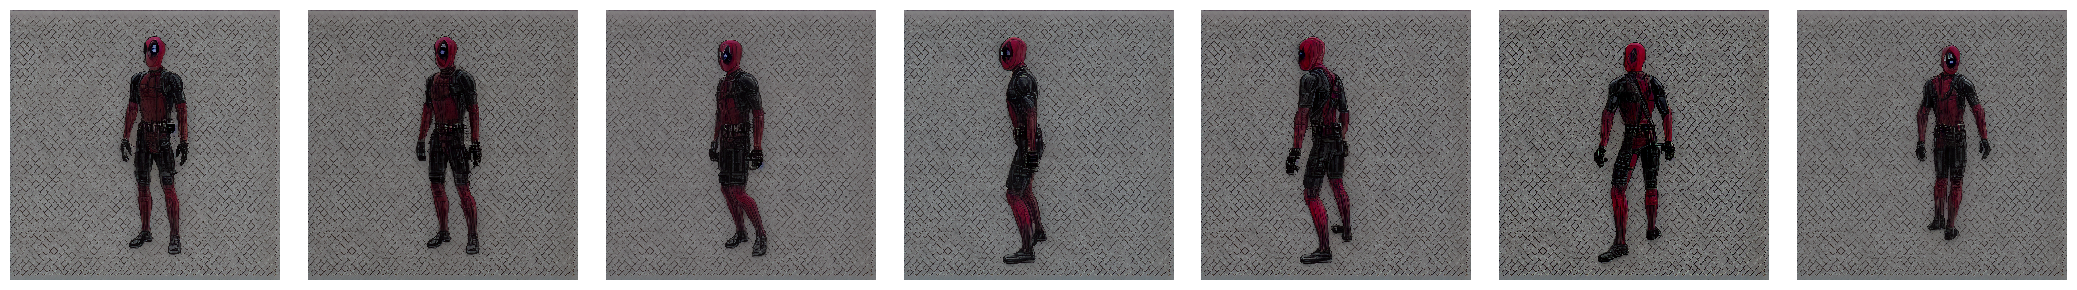

In [14]:
from matplotlib.transforms import Bbox
from text3d2video.util import ordered_sample_indices
from text3d2video.utilities.ipython_utils import display_ims

frame_indices = ordered_sample_indices(data.gr_frames, 7)
gr_frames = [data.gr_frames[i] for i in frame_indices]
uvs = [data.uvs[i] for i in frame_indices]

fig, axs = display_ims(gr_frames, show=False)

for i, ax in enumerate(axs):
    pass
    # box = Bbox.from_bounds(220, 100, 100, 100)
    # ax = add_inset(ax, loc="upper left", width="20%")
    # ax.imshow(uvs[i])
    # add_zoom_inset(ax, box)

# plt.savefig("outs/camera_z_movement_stormtrooper.pdf", dpi=300, bbox_inches="tight")

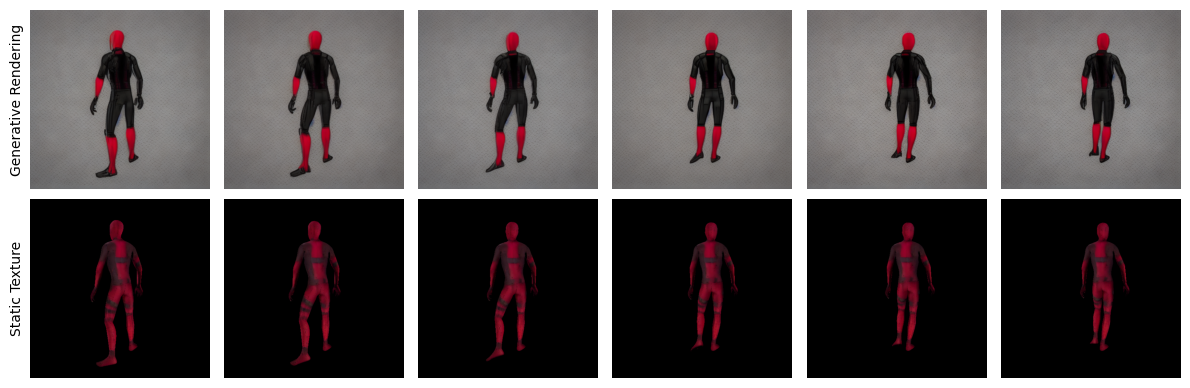

In [8]:
from text3d2video.util import ordered_sample_indices
from text3d2video.utilities.ipython_utils import display_ims_grid

frame_indices = ordered_sample_indices(data.gr_frames, 6)
gr_frames = [data.gr_frames[i] for i in frame_indices]
renders = [data.renders[i] for i in frame_indices]

fig, axs = display_ims_grid(
    [gr_frames, renders],
    row_titles=["Generative Rendering", "Static Texture"],
    show=False,
    scale=2
)

zoom_box = Bbox.from_bounds(210, 70, 100, 100)

# for ax in axs[0]:
#     add_zoom_inset(ax, zoom_box)

# for ax in axs[1]:
#     add_zoom_inset(ax, zoom_box)

fig.savefig("metalic_cat.pdf", dpi=300, bbox_inches="tight")

In [9]:
from scripts.wandb_experiments.texgen_vs_gr_experiment import comparison_vid
from text3d2video.utilities.ipython_utils import display_vid

display_vid(comparison_vid(data), width=1000)

TypeError: display_vid() got an unexpected keyword argument 'width'